In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# SVM, AdaBoost, Naive Bayes

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred):

  conf_mat = confusion_matrix(y_test, y_pred)
  tn,fp,fn,tp = conf_mat.ravel()

  print("tn", tn)
  print("tp",tp)
  print("fp",fp)
  print("fn",fn)

  plt.figure(figsize = (8,6))
  sns.heatmap([[tp,fp],[fn,tn]],annot = True,fmt = 'd', cmap = 'plasma', xticklabels = ['Positive', 'Negative'], yticklabels = ['Positive', 'Negative'])
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

  precision = tp/(tp + fp)
  recall = tp/(tp + fn)
  f1_score = 2 * (precision * recall)/(precision + recall)

  print()
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1 Score: {f1_score}')

In [15]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/full_encoded_data_2_no_purpose.csv")

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,1048575.0,14681.334955,8737.966153,1000.00,8000.00,12500.00,20000.00,40000.00
funded_amnt,1048575.0,14680.908066,8737.639790,1000.00,8000.00,12500.00,20000.00,40000.00
funded_amnt_inv,1048575.0,14674.677606,8734.501416,750.00,8000.00,12500.00,20000.00,40000.00
term,1048575.0,41.822508,10.287793,36.00,36.00,36.00,36.00,60.00
int_rate,1048575.0,13.202889,4.794055,5.31,9.71,12.69,15.99,30.99
...,...,...,...,...,...,...,...,...
encoded_WA,1048575.0,0.021766,0.145918,0.00,0.00,0.00,0.00,1.00
encoded_WI,1048575.0,0.013230,0.114260,0.00,0.00,0.00,0.00,1.00
encoded_WV,1048575.0,0.003377,0.058013,0.00,0.00,0.00,0.00,1.00
encoded_WY,1048575.0,0.002190,0.046742,0.00,0.00,0.00,0.00,1.00


In [17]:
data = data.drop(columns=['recoveries'])

In [18]:
X = data.drop('Label', axis=1)
y = data['Label']

#Feature Selection

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
          Feature  Importance
10            dti    0.055481
22    avg_cur_bal    0.052775
14      revol_bal    0.052178
18    tot_cur_bal    0.051254
23        bc_util    0.050568
..            ...         ...
28    encoded_ANY    0.000045
31  encoded_OTHER    0.000017
30   encoded_NONE    0.000009
27  hardship_flag    0.000003
55     encoded_IA    0.000002

[94 rows x 2 columns]


In [20]:
top_20 = feature_importance_df.iloc[:20,:]['Feature']
selected_columns = top_20.to_list()
print(selected_columns)

['dti', 'avg_cur_bal', 'revol_bal', 'tot_cur_bal', 'bc_util', 'revol_util', 'int_rate', 'annual_inc', 'sub_grade', 'installment', 'total_acc', 'funded_amnt_inv', 'loan_amnt', 'funded_amnt', 'open_acc', 'num_sats', 'emp_length', 'total_bal_il', 'all_util', 'grade']


In [22]:
selected_columns = ['int_rate', 'dti', 'sub_grade', 'avg_cur_bal', 'tot_cur_bal', 'revol_bal', 'bc_util', 'revol_util', 'annual_inc', 'installment', 'total_acc', 'grade', 'funded_amnt_inv', 'funded_amnt', 'total_bal_il', 'loan_amnt', 'all_util', 'open_acc', 'num_sats']
data_selected = data[selected_columns]

In [23]:
X = data_selected
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = data.drop('Label', axis=1)
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [25]:
X_train.shape

(734002, 94)

In [29]:
sc = StandardScaler()
X_standardized = sc.fit_transform(X)

In [30]:
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

print(X_standardized_df.describe().T)

                     count          mean  std       min       25%       50%  \
loan_amnt        1048575.0 -4.669528e-17  1.0 -1.565735 -0.764633 -0.249639   
funded_amnt      1048575.0 -6.484890e-18  1.0 -1.565745 -0.764613 -0.249599   
funded_amnt_inv  1048575.0  1.973927e-17  1.0 -1.594216 -0.764174 -0.248976   
term             1048575.0  1.968913e-16  1.0 -0.565963 -0.565963 -0.565963   
int_rate         1048575.0 -1.577949e-15  1.0 -1.646392 -0.728588 -0.106984   
...                    ...           ...  ...       ...       ...       ...   
encoded_VT       1048575.0  6.844033e-18  1.0 -0.044529 -0.044529 -0.044529   
encoded_WA       1048575.0 -2.686113e-17  1.0 -0.149164 -0.149164 -0.149164   
encoded_WI       1048575.0 -3.037124e-17  1.0 -0.115792 -0.115792 -0.115792   
encoded_WV       1048575.0  7.806263e-18  1.0 -0.058210 -0.058210 -0.058210   
encoded_WY       1048575.0 -1.479937e-17  1.0 -0.046845 -0.046845 -0.046845   

                      75%        max  
loan_amnt   

In [31]:
import pandas as pd
from scipy.stats import zscore

z_scores = zscore(X_standardized)
threshold = 3
outlier_mask = (abs(z_scores) < threshold).all(axis=1)
X_no_outliers = X_standardized[outlier_mask]

In [32]:
X_no_outliers.shape

(126637, 94)

In [33]:
y_train.value_counts()

0    588794
1    145208
Name: Label, dtype: int64

Accuracy: 0.5422938395857242

Confusion Matrix:
 [[138119 114193]
 [ 29789  32472]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.55      0.66    252312
           1       0.22      0.52      0.31     62261

    accuracy                           0.54    314573
   macro avg       0.52      0.53      0.48    314573
weighted avg       0.70      0.54      0.59    314573


tn 138119
tp 32472
fp 114193
fn 29789


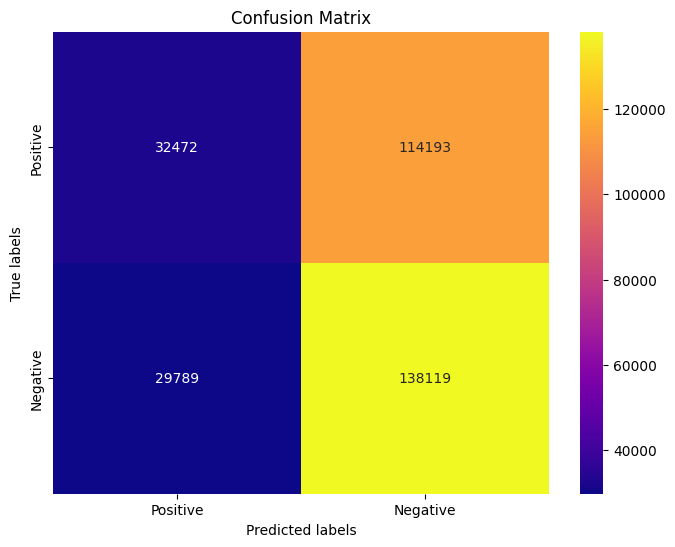


Precision: 0.22140251593768112
Recall: 0.5215463934083937
F1 Score: 0.31084690273111054


In [34]:
# Further split the training set to create a smaller subset (5% of the total data)
X_sampled, _, y_sampled, _ = train_test_split(X_train, y_train, train_size=0.0001, random_state=42)

svm_model = SVC(kernel='poly', degree = 100, C=1.0, random_state=42)
svm_model.fit(X_sampled, y_sampled)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print()
print("Confusion Matrix:\n", conf_matrix)
print()
print("Classification Report:\n", classification_rep)
print()
plot_confusion_matrix(y_test,y_pred)

Naive Bayes Model:
Accuracy: 0.54480835926796

Confusion Matrix:
 [[125072 127240]
 [ 15951  46310]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.50      0.64    252312
           1       0.27      0.74      0.39     62261

    accuracy                           0.54    314573
   macro avg       0.58      0.62      0.51    314573
weighted avg       0.76      0.54      0.59    314573


tn 125072
tp 46310
fp 127240
fn 15951


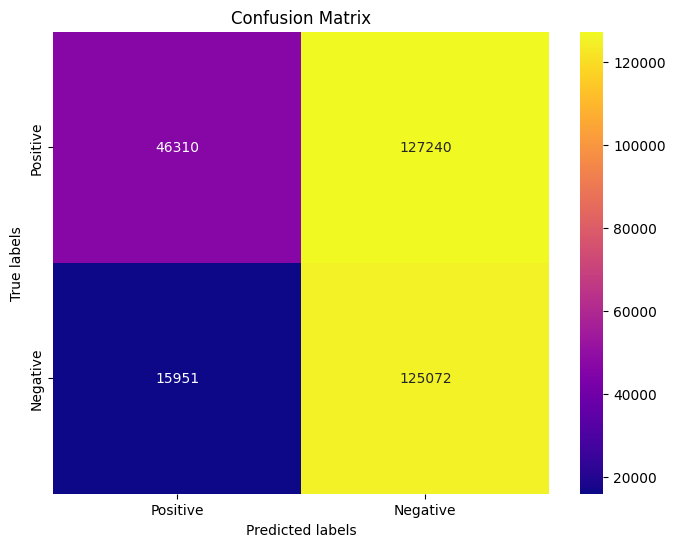


Precision: 0.26683952751368484
Recall: 0.7438043076725398
F1 Score: 0.3927721777185967


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Further split the training set to create a smaller subset (5% of the total data)
X_sampled, _, y_sampled, _ = train_test_split(X_train, y_train, train_size=0.05, random_state=42)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_sampled, y_sampled)
y_pred_nb = nb_model.predict(X_test)

# Evaluate Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

print("Naive Bayes Model:")
print("Accuracy:", accuracy_nb)
print()
print("Confusion Matrix:\n", conf_matrix_nb)
print()
print("Classification Report:\n", classification_rep_nb)
print()
plot_confusion_matrix(y_test,y_pred_nb)

AdaBoost Model:
Accuracy: 0.8042680077438306

Confusion Matrix:
 [[249403   2909]
 [ 58663   3598]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89    252312
           1       0.55      0.06      0.10     62261

    accuracy                           0.80    314573
   macro avg       0.68      0.52      0.50    314573
weighted avg       0.76      0.80      0.73    314573


tn 249403
tp 3598
fp 2909
fn 58663


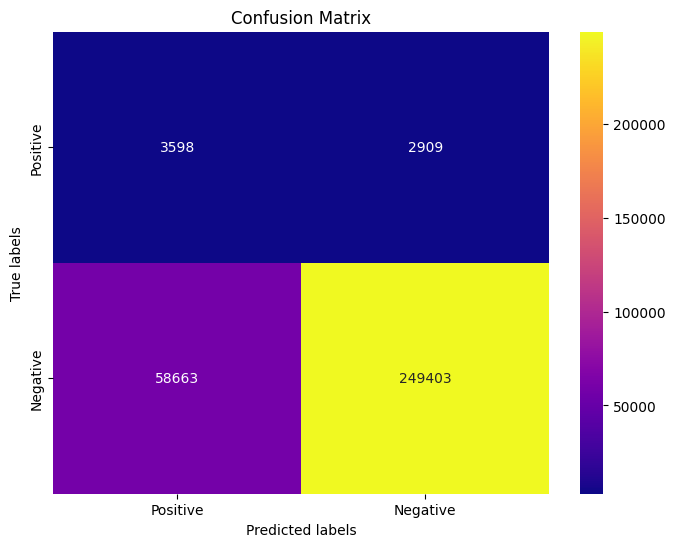


Precision: 0.5529429844782542
Recall: 0.057788985078941875
F1 Score: 0.10464169381107491


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Further split the training set to create a smaller subset (5% of the total data)
X_sampled, _, y_sampled, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)

# AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_sampled, y_sampled)
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate AdaBoost model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
classification_rep_adaboost = classification_report(y_test, y_pred_adaboost)

print("AdaBoost Model:")
print("Accuracy:", accuracy_adaboost)
print()
print("Confusion Matrix:\n", conf_matrix_adaboost)
print()
print("Classification Report:\n", classification_rep_adaboost)
print()
plot_confusion_matrix(y_test,y_pred_adaboost)

In [37]:
print(X_train.shape)

(734002, 94)


#class imbalance handling

In [38]:
y_train.value_counts()

0    588794
1    145208
Name: Label, dtype: int64

In [39]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Class distribution
y_train_rus.value_counts()

0    145208
1    145208
Name: Label, dtype: int64

In [40]:
X_sampled, _, y_sampled, _ = train_test_split(X_train_rus, y_train_rus, train_size=0.1, random_state=42)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_sampled, y_sampled)
y_pred_nb = nb_model.predict(X_test)

# Evaluate Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

print("Naive Bayes Model:")
print("Accuracy:", accuracy_nb)
print("Confusion Matrix:\n", conf_matrix_nb)
print("Classification Report:\n", classification_rep_nb)

Naive Bayes Model:
Accuracy: 0.6996627173978694
Confusion Matrix:
 [[187484  64828]
 [ 29650  32611]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.74      0.80    252312
           1       0.33      0.52      0.41     62261

    accuracy                           0.70    314573
   macro avg       0.60      0.63      0.60    314573
weighted avg       0.76      0.70      0.72    314573



AdaBoost Model:
Accuracy: 0.6437265753894963

Confusion Matrix:
 [[160788  91524]
 [ 20550  41711]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.64      0.74    252312
           1       0.31      0.67      0.43     62261

    accuracy                           0.64    314573
   macro avg       0.60      0.65      0.58    314573
weighted avg       0.77      0.64      0.68    314573


tn 160788
tp 41711
fp 91524
fn 20550


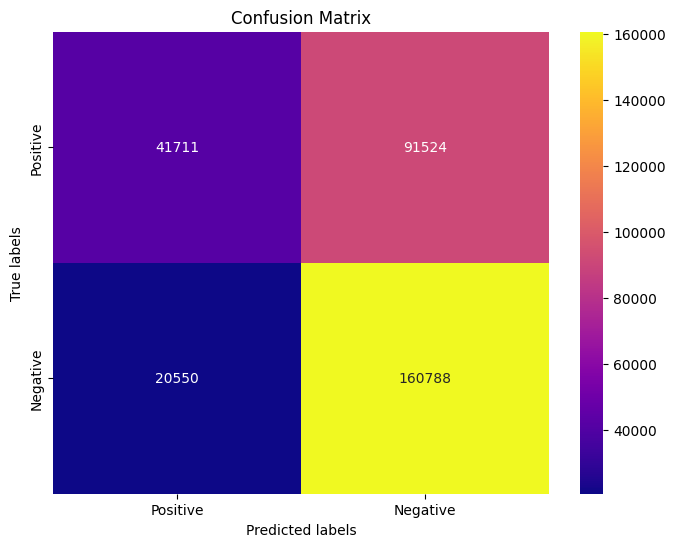


Precision: 0.3130633842458813
Recall: 0.6699378423089896
F1 Score: 0.4267197282808855


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_sampled, y_sampled)
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate AdaBoost model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
classification_rep_adaboost = classification_report(y_test, y_pred_adaboost)

print("AdaBoost Model:")
print("Accuracy:", accuracy_adaboost)
print()
print("Confusion Matrix:\n", conf_matrix_adaboost)
print()
print("Classification Report:\n", classification_rep_adaboost)
print()
plot_confusion_matrix(y_test,y_pred_adaboost)

### Accuracy drops on RUS, minor drop in NB but significant (4%) in Adaboost

#Hyperparamter Tuning

##Gausian Naive Bayes (NB)

In [43]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model,
                     param_grid=params_NB,
                     cv=cv_method,
                     verbose=2,
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_train)

gs_NB.fit(Data_transformed, y_train)

print(gs_NB.best_score_)

BracketError: ignored

In [ ]:
print(gs_NB.best_params_)

##Adaboost

AdaBoost Model:
Accuracy: 80.45254996455513

Confusion Matrix:
 [[248997   3315]
 [ 58176   4085]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89    252312
           1       0.55      0.07      0.12     62261

    accuracy                           0.80    314573
   macro avg       0.68      0.53      0.50    314573
weighted avg       0.76      0.80      0.74    314573


tn 248997
tp 4085
fp 3315
fn 58176


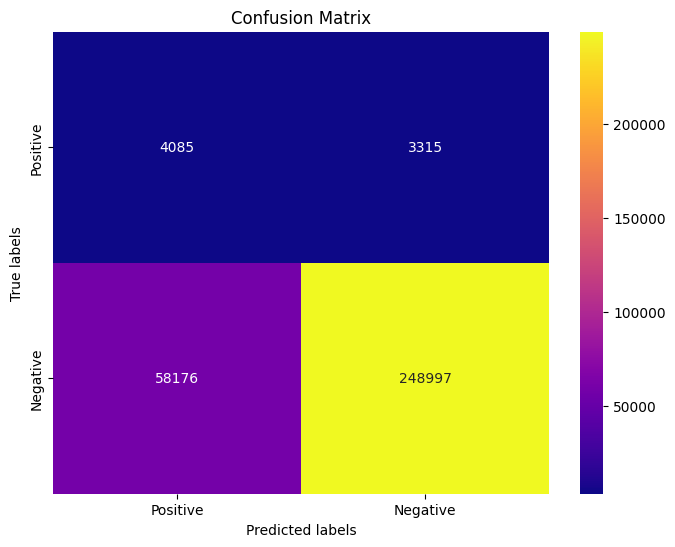


Precision: 0.552027027027027
Recall: 0.06561089606655852
F1 Score: 0.11728226697865375


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Further split the training set to create a smaller subset (10% of the total data)
X_sampled, _, y_sampled, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)

base_estimator = DecisionTreeClassifier(max_depth=8, min_samples_leaf=125, criterion = 'gini', max_leaf_nodes=249)

# AdaBoost
adaboost_model = AdaBoostClassifier(estimator = base_estimator, n_estimators=15, learning_rate = 0.1, random_state=42)
adaboost_model.fit(X_sampled, y_sampled)
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate AdaBoost model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
classification_rep_adaboost = classification_report(y_test, y_pred_adaboost)

print("AdaBoost Model:")
print("Accuracy:", accuracy_adaboost*100)
print()
print("Confusion Matrix:\n", conf_matrix_adaboost)
print()
print("Classification Report:\n", classification_rep_adaboost)
print()
plot_confusion_matrix(y_test,y_pred_adaboost)